# Setup

In [1]:
# You need this in order to read the CSV from GDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Imports and some settings to display wide tables
import pandas as pd
pd.options.display.max_rows = 60
pd.options.display.min_rows = None
import matplotlib.pylab as plt
import numpy as np 
from collections import Counter
from wordcloud import WordCloud, STOPWORDS 

from gensim.summarization.summarizer import summarize 
from gensim.summarization import keywords 

from IPython.display import display, Markdown

# Read Data

In [3]:
dataset = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Surveys/My Lovely Survey.csv")

# Common Functions

In [4]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [5]:
def plotPieChart(column):
  freq_count = Counter(df[column])
  fig, ax = plt.subplots(figsize=(15, 7), subplot_kw=dict(aspect="equal"))
  patches, texts, autotexts = ax.pie(freq_count.values(), labels=freq_count.keys(), autopct=make_autopct(freq_count.values()), textprops=dict(color="w", size=12, weight='bold'))
  ax.legend(patches, freq_count.keys(), loc="upper left")
  ax.set_title(column)
  plt.show()

In [6]:
def plotHorzBar(column):
  data = df[column]
  count = {}
  for d in data:
    words = d.split(";")
    for w in words:
      if w in count.keys():
        count[w] = count[w] + 1
      else:
        count[w] = 1
  
  y_pos = np.arange(len(count.keys()))
  plt.barh(y_pos,count.values())
  plt.yticks(y_pos, count.keys())
  plt.show()

In [7]:
def plotBar(column):
  data = df[column]
  data = data.dropna()
  count = {1:0,2:0,3:0,4:0,5:0}
  for d in data:
    count[d] = count[d] + 1

  y_pos = range(1,6)
  plt.bar(y_pos,count.values())
  plt.yticks(y_pos, count.keys())
  plt.title("1 - highly disagree, 5 - highly agree")
  plt.show()  

In [23]:
# This is taken from https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

def plotWordCloud(column):
  data = df[column]
  data = data.dropna()
  text = data.to_string()

  wordcloud = WordCloud(width = 900, height = 500, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)

  plt.figure(figsize=(20, 15))
  # Display image
  plt.imshow(wordcloud) 
  # No axis details
  plt.axis("off");

In [19]:
# This is taken from https://www.geeksforgeeks.org/python-extractive-text-summarization-using-gensim/

def summarizeFeedback(column):
  data = df[column]
  data = data.dropna()
  text = data.to_string()

  summ_per = summarize(text, ratio = 0.30)
  summ = Markdown('<h3>{}</h3>'.format(summ_per))
  return summ

# Survey Results

In [13]:
df = dataset.copy()
df

Timestamp  ...                             An open ended question
0  2020/08/29 10:03:54 PM MDT  ...  Darrell Sales is no stranger to wildfires. As ...
1  2020/08/29 10:04:50 PM MDT  ...  Crews continued to beat back the three massive...
2  2020/08/29 10:05:54 PM MDT  ...  Every other week for the past 18 years, my wif...
3  2020/08/29 10:06:51 PM MDT  ...  Luckily we found a supermarket with ice and re...
4  2020/08/29 10:07:30 PM MDT  ...  And the California wine industry, already hurt...

[5 rows x 5 columns]

### This is a multiple choice question?

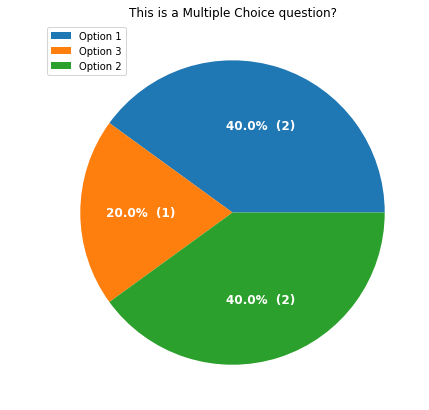

In [14]:
plotPieChart("This is a Multiple Choice question?")

### This is a checkbox question

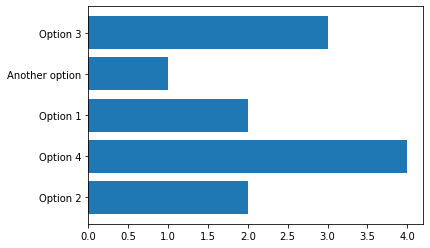

In [15]:
plotHorzBar("This is a checkbox question")

### On a scale of 1 to 5, 1 being I totally disagree and 5 I totally agree

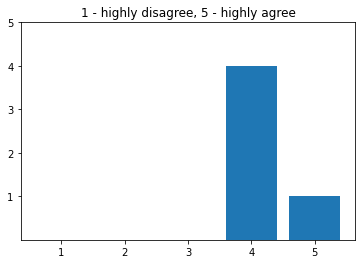

In [16]:
plotBar("On a scale of 1 to 5, 1 being I totally disagree and 5 I totally agree")

### An open ended question

In [20]:
summarizeFeedback("An open ended question")

<h3>3    Luckily we found a supermarket with ice and re...</h3>

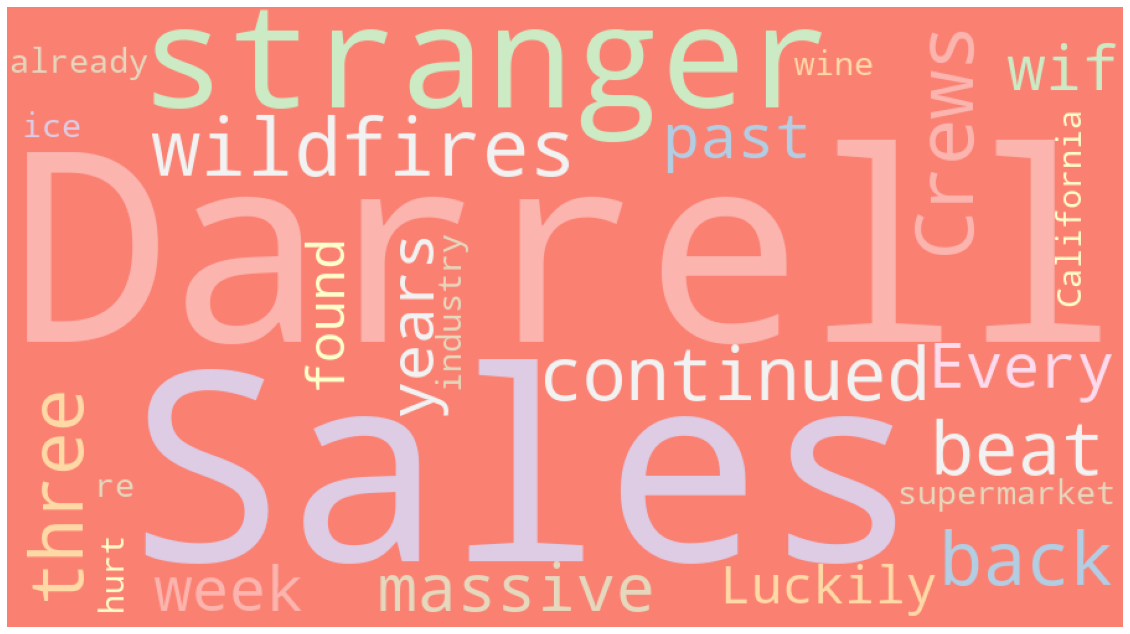

In [24]:
plotWordCloud("An open ended question")